In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


url="https://raw.githubusercontent.com/elbixos/L3_IA/master/Cours/TP/winequality-white.csv"

!wget $url

--2022-04-03 15:58:37--  https://raw.githubusercontent.com/elbixos/L3_IA/master/Cours/TP/winequality-white.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/plain]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K  --.-KB/s    in 0.03s   

2022-04-03 15:58:37 (8.09 MB/s) - ‘winequality-white.csv’ saved [264426/264426]



In [2]:
filename="winequality-white.csv"
data = pd.read_csv(filename,sep=';')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
print(data.shape)
nb = data.shape[0]
print("nb exemples",nb)
data.head(4)


(4898, 12)
nb exemples 4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
x = data["quality"]
print (x)
print(type(x))

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64
<class 'pandas.core.series.Series'>


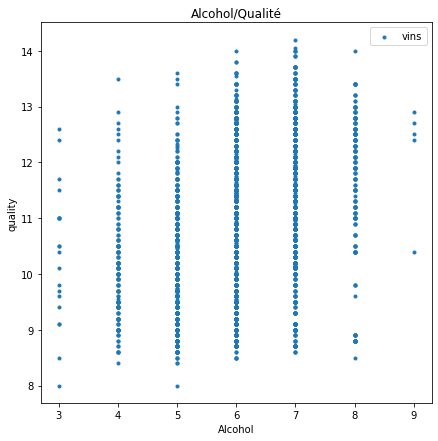

In [5]:
fig, ax = plt.subplots(figsize=(7,7))  # Create a figure and an axes.
ax.scatter(data["quality"], data["alcohol"], marker='.',  label='vins')
# Plot some data on the axes.
ax.set_xlabel('Alcohol')  # Add an x-label to the axes.
ax.set_ylabel('quality')  # Add a y-label to the axes.
ax.set_title("Alcohol/Qualité")  # Add a title to the axes.
ax.legend();  # Add a legend.

In [6]:
plt.savefig('acidity_pH.png')

<Figure size 432x288 with 0 Axes>

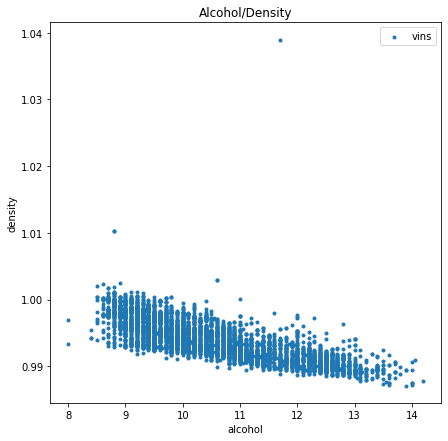

In [7]:
fig, ax = plt.subplots(figsize=(7,7))  # Create a figure and an axes.
ax.scatter(data["alcohol"], data["density"], marker='.',  label='vins')
# Plot some data on the axes.
ax.set_xlabel('alcohol')  # Add an x-label to the axes.
ax.set_ylabel('density')  # Add a y-label to the axes.
ax.set_title("Alcohol/Density")  # Add a title to the axes.
ax.legend();  # Add a legend.

In [8]:
plt.savefig('alcohol_density.png')

<Figure size 432x288 with 0 Axes>

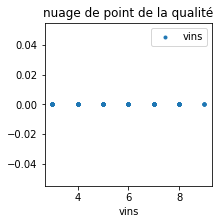

In [9]:
fig, ax = plt.subplots(figsize=(3,3))  # Create a figure and an axes.
ax.scatter(data.quality,np.zeros_like(data.quality), marker='.',  label='vins')
# Plot some data on the axes.
ax.set_xlabel('vins')  # Add an x-label to the axes.
ax.set_title("nuage de point de la qualité")  # Add a title to the axes.
ax.legend();  # Add a legend.

(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

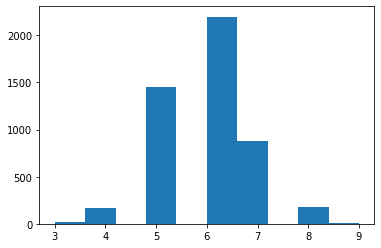

In [10]:
counts, bins = np.histogram(data.quality)
plt.hist(bins[:-1], bins, weights=counts)

(array([  83.,  931., 1440., 1402.,  595.,  263.,  134.,   26.,   20.,
           4.]),
 array([0.22 , 0.306, 0.392, 0.478, 0.564, 0.65 , 0.736, 0.822, 0.908,
        0.994, 1.08 ]),
 <a list of 10 Patch objects>)

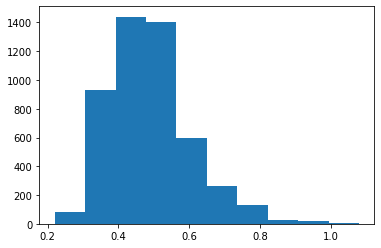

In [11]:
counts, bins = np.histogram(data.sulphates)
plt.hist(bins[:-1], bins, weights=counts)

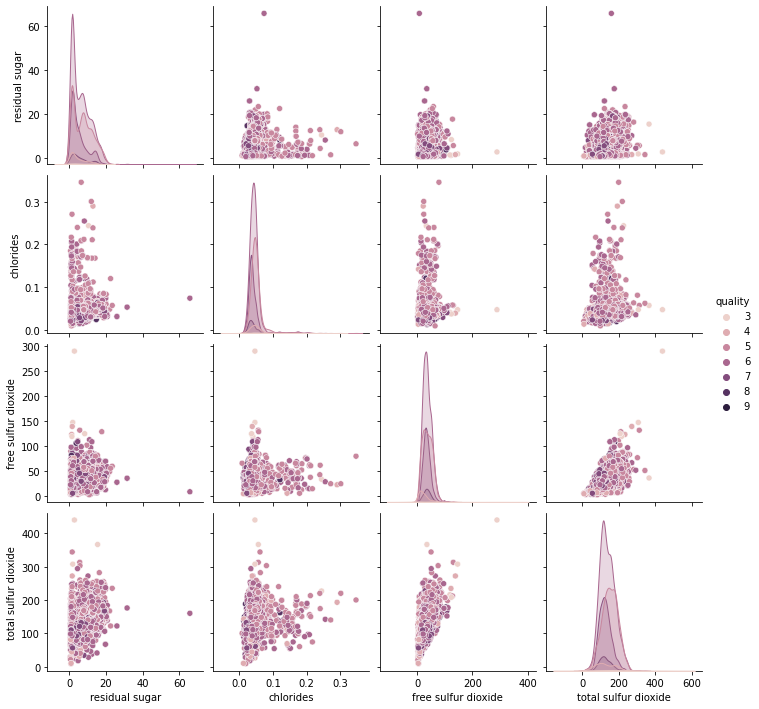

In [12]:
h = sns.pairplot(data, vars=["residual sugar", "chlorides","free sulfur dioxide","total sulfur dioxide"], hue="quality")
plt.show(h)

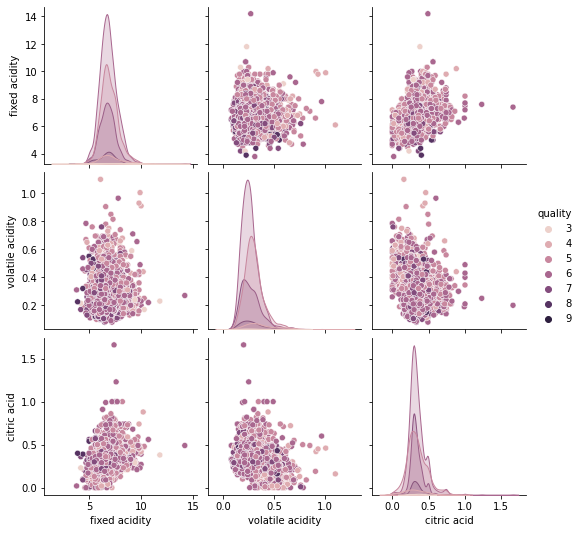

In [13]:
g = sns.pairplot(data, vars=["fixed acidity", "volatile acidity","citric acid"], hue="quality")
plt.show(g)

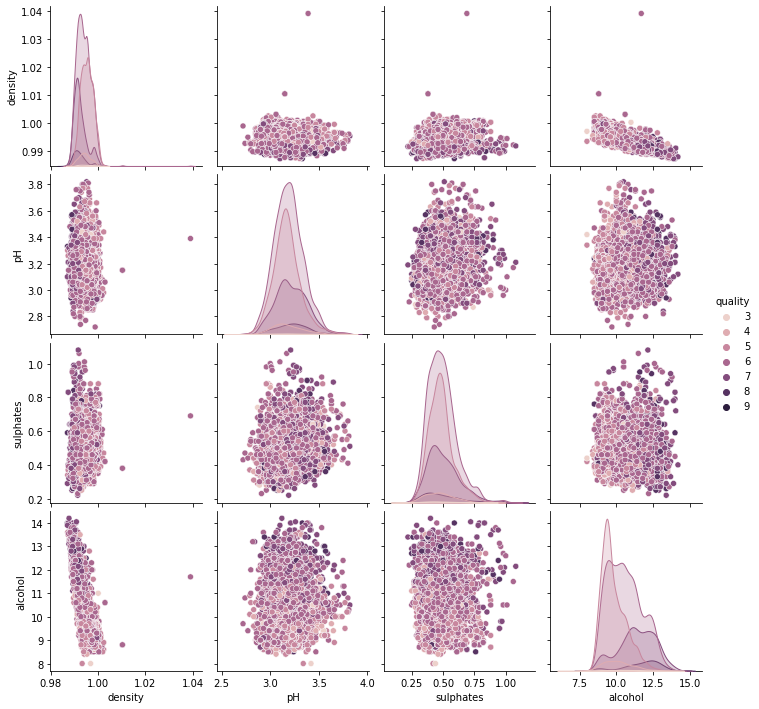

In [14]:
i = sns.pairplot(data, vars=["density","pH","sulphates","alcohol"],hue="quality")
plt.show(i)

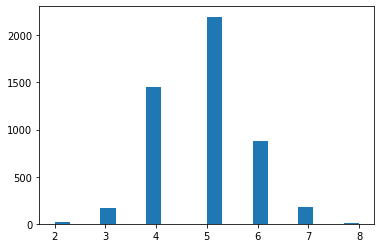

In [15]:
data["quality"] = data["quality"] - 1
plt.hist(data.quality,bins=20)
plt.show()

In [16]:
plt.savefig('histo.png')

<Figure size 432x288 with 0 Axes>

On remarque....

In [17]:
#Je garde les labels
y=data.quality
print(y.head())

# on les dégage des caractéristiques (et les labels aussi)
x=data.drop(['chlorides', 'free sulfur dioxide', 'fixed acidity', 'quality', 'citric acid'],axis=1)

x.head()

0    5
1    5
2    5
3    5
4    5
Name: quality, dtype: int64


,volatile acidity,residual sugar,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.27,20.7,170.0,1.0010,3.00,0.45,8.8
1,0.30,1.6,132.0,0.9940,3.30,0.49,9.5
2,0.28,6.9,97.0,0.9951,3.26,0.44,10.1
3,0.23,8.5,186.0,0.9956,3.19,0.40,9.9
4,0.23,8.5,186.0,0.9956,3.19,0.40,9.9


In [18]:
# Le split en lui meme 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

print (x_train.shape)
print (x_test.shape)

print(type(x_train))

(3428, 7)
(1470, 7)
<class 'pandas.core.frame.DataFrame'>


In [19]:
# Création de l'algo...
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train, y_train)

# Utilisation de l'algo sur l'exemple 21 de la base de test
aResu= neigh.predict([x_test.iloc[15]])
print("Resultat prédit :",aResu, "Resultat Attendu ",y_test.iloc[15])

# Mesure de performances 
train_accuracy = neigh.score(x_train, y_train)
print("Perf en apprentissage", train_accuracy)

test_accuracy = neigh.score(x_test, y_test)
print("Perf en validation", test_accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Resultat prédit : [4] Resultat Attendu  4
Perf en apprentissage 1.0
Perf en validation 0.5619047619047619


In [20]:
# Création de l'algo...
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

# Mesure de performances 
train_accuracy = neigh.score(x_train, y_train)
print("Perf en apprentissage", train_accuracy)

test_accuracy = neigh.score(x_test, y_test)
print("Perf en validation", test_accuracy)

Perf en apprentissage 0.7263710618436406
Perf en validation 0.48367346938775513


In [21]:
# Création de l'algo...
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)

# Mesure de performances 
train_accuracy = neigh.score(x_train, y_train)
print("Perf en apprentissage", train_accuracy)

test_accuracy = neigh.score(x_test, y_test)
print("Perf en validation", test_accuracy)

Perf en apprentissage 0.648191365227538
Perf en validation 0.48775510204081635


Perf en validation : 71% pour les 3 plus proches voisins
Perf en validation :69% pour les 5 plus proches voisins
Plus on augmente le nombre de voisins plus la performane diminue

In [22]:
#NORMALISATION DES DONNEES
from sklearn import preprocessing

# On calcule les parametres de la normalisation
scaler = preprocessing.StandardScaler().fit(x_train)

# Et on normalise les 2 bases
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

# On a perdu les dataFrames dans la bataille,
#   x_test_norm est maintenant un ndarray...
print(x_train_norm)
print(x_test_norm)

[[-0.28780076  1.55066891  1.06724029 ... -1.13031916  0.0940735
  -1.14685943]
 [-0.18935432 -0.62552076 -1.21962724 ... -1.06354794 -1.49278025
   0.64257527]
 [-0.48469365 -0.95583527 -0.79083958 ...  0.87281754 -0.61119484
   0.56123733]
 ...
 [-0.09090788 -0.62552076  0.32877265 ... -1.13031916  0.35854912
   0.72391321]
 [-0.3862472   1.41465705 -0.10001501 ... -0.12875081 -0.963829
   0.07320968]
 [-0.09090788 -0.91697474 -0.83848265 ...  0.2051053   1.24013454
  -0.0894662 ]]
[[ 0.105985    0.85117937  0.25730804 ... -0.6629206   0.88750037
   0.3714488 ]
 [ 2.4686996  -0.72267209 -0.24294423 ...  0.07156286  0.35854912
   2.18799615]
 [-0.28780076 -0.83925368 -0.33823038 ...  0.60573264 -0.5230363
   1.37461674]
 ...
 [ 1.18889586 -0.89754447  1.21016951 ... -1.26386161  0.53486621
   0.72391321]
 [ 0.79511009 -0.35349705 -0.33823038 ...  0.53896142 -1.31646317
   1.6999685 ]
 [ 1.2873423  -0.62552076  0.61463109 ...  2.27501322  2.65067121
   0.96792703]]


In [23]:
# Le plus proche voisin sur les données normalisées
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train_norm, y_train)

# Mesure de performances 
train_accuracy = neigh.score(x_train_norm, y_train)
print("Perf en apprentissage", train_accuracy)

test_accuracy = neigh.score(x_test_norm, y_test)
print("Perf en validation", test_accuracy)

Perf en apprentissage 1.0
Perf en validation 0.6074829931972789


77% en validation pour les données normalisées contre 74% lorsqu'elles ne sont pas normalisées

In [24]:
# Création de l'algo...
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_norm, y_train)

# Mesure de performances 
train_accuracy = neigh.score(x_train_norm, y_train)
print("Perf en apprentissage", train_accuracy)

test_accuracy = neigh.score(x_test_norm, y_test)
print("Perf en validation", test_accuracy)

Perf en apprentissage 0.7742123687281214
Perf en validation 0.5374149659863946


76% pour les 3 plus proches voisins avec des données normalisées contre 71% 

In [25]:
from sklearn import svm

# J'ai oublié pourquoi gamma, faudrait regarder... "C" a un rapport
# avec le fait que les données ne sont pas linéairement séparables...
algoSVM = svm.SVC(gamma=0.001, C=100.)

algoSVM.fit(x_train_norm,y_train)

train_accuracy = algoSVM.score(x_train_norm, y_train)
print("Perf en apprentissage", train_accuracy)

test_accuracy = algoSVM.score(x_test_norm, y_test)
print("Perf en validation", test_accuracy)

Perf en apprentissage 0.5265460910151692
Perf en validation 0.5231292517006803


In [26]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(7)),
  tf.keras.layers.Dense(14,activation='relu'),
  tf.keras.layers.Dense(14, activation='relu'),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Easy isn't it ?

# On vérifie en regardant le résumé de ce réseau :
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                112       
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                150       
                                                                 
Total params: 472
Trainable params: 472
Non-trainable params: 0
_________________________________________________________________


In [27]:
BATCH_SIZE = 100

# La base d'apprentissage
dataset = tf.data.Dataset.from_tensor_slices((x_train_norm,y_train))
dataset = dataset.shuffle(x_train_norm.shape[0])
dataset = dataset.batch(BATCH_SIZE)

train_dataset = dataset

# La base de validation
dataset = tf.data.Dataset.from_tensor_slices((x_test_norm,y_test))
dataset = dataset.shuffle(x_test_norm.shape[0])
dataset = dataset.batch(BATCH_SIZE)

test_dataset = dataset

In [28]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=300, verbose=0)

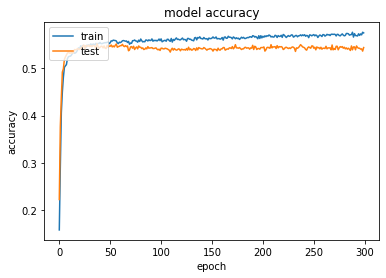

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

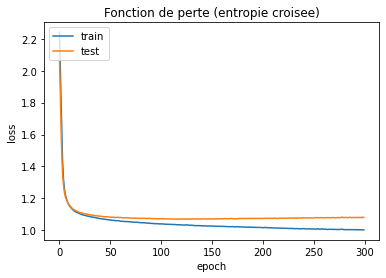

In [30]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Fonction de perte (entropie croisee)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
results = model.evaluate(test_dataset)

15/15 [==============================] - 0s 2ms/step - loss: 1.0796 - accuracy: 0.5435


In [32]:
y_pred = model.predict(test_dataset)
y_pred = tf.argmax(y_pred,axis=1)

In [33]:
print("Prediction: {}".format(y_pred))
print("    Labels: {}".format(y_test))

Prediction: [6 5 6 ... 5 5 5]
    Labels: 4656    6
3659    7
907     7
4352    4
3271    6
       ..
4235    4
4588    4
3377    5
1503    6
1971    6
Name: quality, Length: 1470, dtype: int64


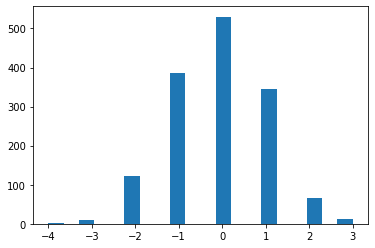

In [34]:
erreur = y_pred - y_test
plt.hist(erreur,bins=20)
plt.show()

In [35]:
MAE = np.mean(abs(y_pred - y_test))
print(MAE)

0.7986394557823129


In [36]:
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(matrix)

[[  0   0   0   7   0   0]
 [  0   0  12  23   5   0]
 [  0   2 116 268  40   0]
 [  0   4 211 386  65   2]
 [  0   1  83 168  28   0]
 [  0   1   9  35   4   0]]
